# GaussianNB

In [1]:
import some_load_train_evaluate_functions as ml

from sklearn.naive_bayes import GaussianNB

In [2]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [3]:
# Diabetes data

diabetes_df = ml.get_data_of_disease(driver, 'Diabetes')
diabetes_df

,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],Basophils [%],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Diabetes
0,93703,0,2,17.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,93704,1,2,15.7,74.4,NaN,NaN,NaN,NaN,0.7,...,36.60,NaN,13.1,NaN,NaN,NaN,NaN,30.6,NaN,0
2,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,1.0,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0
3,93706,1,18,21.5,53.8,1.629630,0.160,0.031,16.765,0.8,...,284.00,16.0,16.3,NaN,NaN,142.0,51.0,34.0,NaN,0
4,93707,1,13,18.1,58.2,1.857143,0.009,0.044,22.756,0.5,...,49.30,9.0,14.5,NaN,NaN,177.0,21.0,34.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8888,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,0.6,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,1
8889,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,0.6,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0
8890,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,1.4,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0
8891,102955,0,14,45.6,61.9,1.205882,0.031,0.079,17.856,0.9,...,11.40,16.0,11.4,NaN,NaN,158.0,5.0,57.7,NaN,0


### Training

In [7]:
gaussian_nb = GaussianNB()

# Attributes and Labels

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

# Training

gaussian_nb.fit(X_train, y_train)

# Accuracy scores

y_pred = gaussian_nb.predict(X_val)

print('Training Accuracy: ',ml.accuracy_score(y_train, gaussian_nb.predict(X_train)))

print('Testing Accuracy: ',ml.accuracy_score(y_val, y_pred))

Training Accuracy:  0.835957267360135
Testing Accuracy:  0.8313185268484679


## Feature Selection

### Correlation Analysis

In [4]:
gaussian_nb_test = GaussianNB()

In [5]:
pos_corr, neg_corr = ml.get_correlated_features(diabetes_df,'Diabetes',pos=0.0,neg=-0.0)

corr_features = list(pos_corr.keys()[1:]) + list(neg_corr.keys())
corr_features.remove('Respondent_ID')
corr_features_ = list(pos_corr.keys()[1:15]) + list(neg_corr.keys()[:15])
corr_features_.remove('Respondent_ID')

corr_features_

['Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Age',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Insulin [pmol/L]',
 'Osmolality [mmol/Kg]',
 'Retinol [umol/L]',
 'Triglyceride [mmol/L]',
 'Alpha-tocopherol [umol/L]',
 'Triglyceride_HDL Ratio',
 'Segmented neutrophils [%]',
 'Neutrophil_Lymphocyte Ratio',
 'C-Reactive Protein [mg/L]',
 'Cobalt [nmol/L]',
 'Eosinophils [%]',
 'UIBC [umol/L]',
 'Nucleated RBCs',
 'Total Cholesterol [mmol/L]',
 'Cis-beta-carotene [umol/L]',
 'Creatine Phosphokinase [IU/L]',
 'Total Calcium [mg/dL]',
 'Trans-beta-carotene [umol/L]',
 'Alpha-carotene [umol/L]',
 'Total Protein [g/dL]',
 'RBC count [million cells/uL]',
 'Sodium [mmol/L]',
 'Alkaline Phosphatase [IU/L]']

In [8]:
ml.evaluate_feature_set(corr_features_, gaussian_nb_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.891

Test Accuracy: 0.892

Precision: 0.600

Recall: 0.612

F1-Score: 0.606


### SelectFromModel

In [8]:
sfm_features = ml.select_from_model_features(ml.LogisticRegression(),X,y)
sfm_features

['Age',
 'BMI',
 'Fasting Glucose [mmol/L]',
 'Glycohemoglobin [%]',
 'Hematocrit [%]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Mean cell hemoglobin [pg]',
 'Mean cell volume [fL]',
 'Non_HDL Ratio',
 'Osmolality [mmol/Kg]',
 'RBC count [million cells/uL]',
 'Retinol [umol/L]',
 'Retinyl palmitate [umol/L]',
 'Sodium [mmol/L]',
 'Total Cholesterol [mmol/L]',
 'Total Cholestrol_HDL Ratio',
 'Triglyceride_HDL Ratio',
 'Vitamin C [umol/L]',
 'White blood cell count [1000 cells/uL]',
 'Alkaline Phosphatase [IU/L]',
 'Gamma Glutamyl Transferase [IU/L]',
 'Hemoglobin [g/dL]',
 'Insulin [pmol/L]',
 'Transferrin receptor [nmol/L]']

In [9]:
sfm_features = list(sfm_features)

ml.evaluate_feature_set(sfm_features, gaussian_nb_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.892

Test Accuracy: 0.887

Precision: 0.582

Recall: 0.601

F1-Score: 0.591


### SelectKBest

In [10]:
k_best_features = ml.select_k_best(X, y, n=30)
k_best_features[:30]

['Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Age',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Osmolality [mmol/Kg]',
 'Retinol [umol/L]',
 'Lymphocyte [%]',
 'Insulin [pmol/L]',
 'Alpha-tocopherol [umol/L]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Segmented neutrophils [%]',
 'Neutrophil_Lymphocyte Ratio',
 'Alpha-crypotoxanthin [umol/L]',
 'Albumin [g/dL]',
 'Direct HDL-Cholesterol [mmol/L]',
 'Platelet_WBC Ratio',
 'C-Reactive Protein [mg/L]',
 'Creatinine [mg/dL]',
 'Ferritin [ng/mL]',
 'Chloride [mmol/L]',
 'Red cell distribution width [%]',
 'Triglyceride [mmol/L]',
 'A/G Ratio',
 'Platelet count [1000 cells/uL]',
 'Triglyceride_HDL Ratio',
 'Trans-lycopene [umol/L]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Total Lycopene [umol/L]',
 'Mean platelet volume [fL]']

In [11]:
ml.evaluate_feature_set(k_best_features[:30], gaussian_nb_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.884

Test Accuracy: 0.881

Precision: 0.555

Recall: 0.622

F1-Score: 0.587


### Recursive Feature Elimination (RFE) 

In [12]:
rfe_features = ml.select_rfe_features(ml.LogisticRegression(),X,y,n=30,step=0.5)
rfe_features[:30]

['Triglyceride [mmol/L]',
 'Glycohemoglobin [%]',
 'Hematocrit [%]',
 'Iron [ug/dL]',
 'Vitamin C [umol/L]',
 'Triglyceride_HDL Ratio',
 'Mean Cell Hgb Conc. [g/dL]',
 'Mean cell hemoglobin [pg]',
 'Mean cell volume [fL]',
 'Albumin [g/dL]',
 'Non_HDL Ratio',
 'Osmolality [mmol/Kg]',
 'Transferrin receptor [nmol/L]',
 'Total Cholestrol_HDL Ratio',
 'Total Cholesterol [mmol/L]',
 'RBC count [million cells/uL]',
 'Retinol [umol/L]',
 'Retinyl palmitate [umol/L]',
 'Retinyl stearate [umol/L]',
 'Total Lycopene [umol/L]',
 'Fasting Glucose [mmol/L]',
 'White blood cell count [1000 cells/uL]',
 'Sodium [mmol/L]',
 'Age',
 'BMI',
 'A/G Ratio',
 'Insulin [pmol/L]',
 'Hemoglobin [g/dL]',
 'Gamma Glutamyl Transferase [IU/L]',
 'Alkaline Phosphatase [IU/L]']

In [13]:
ml.evaluate_feature_set(rfe_features[:30], gaussian_nb_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.888

Test Accuracy: 0.881

Precision: 0.556

Recall: 0.616

F1-Score: 0.584


### Lasso Regularization

In [14]:
l1_selected_features = ml.log_reg_lasso_select(X_train, y_train)
l1_selected_features[:30]

['Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Age',
 'Gender',
 'BMI',
 'Retinol [umol/L]',
 'Total Cholesterol [mmol/L]',
 'Non_HDL Ratio',
 'Alkaline Phosphatase [IU/L]',
 'Insulin [pmol/L]',
 'Osmolality [mmol/Kg]',
 'Vitamin C [umol/L]',
 'Blood lead [umol/L]',
 'Transferrin receptor [nmol/L]',
 'Gamma Glutamyl Transferase [IU/L]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Aspartate Aminotransferase [U/L]',
 'Transferrin Saturation [%]',
 'Creatine Phosphokinase [IU/L]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Lactate Dehydrogenase [IU/L]',
 'Creatinine [mg/dL]',
 'Total Cholestrol_HDL Ratio',
 'White blood cell count [1000 cells/uL]',
 'Platelet_Lymphocyte Ratio',
 'Retinyl palmitate [umol/L]',
 'Uric Acid [mg/dL]',
 'Sodium [mmol/L]',
 'Bicarbonate [mmol/L]',
 'Blood selenium [umol/L]']

In [15]:
ml.evaluate_feature_set(l1_selected_features[:30], gaussian_nb_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.882

Test Accuracy: 0.877

Precision: 0.542

Recall: 0.638

F1-Score: 0.586


### Relief F

In [16]:
relieff_features = ml.relief_feature_select(30,X,y)

In [17]:
relieff_features[:30]

['Age',
 'Glycohemoglobin [%]',
 'BMI',
 'Segmented neutrophils [%]',
 'Hematocrit [%]',
 'Lymphocyte [%]',
 'Hemoglobin [g/dL]',
 'Fasting Glucose [mmol/L]',
 'Retinol [umol/L]',
 'Total Cholesterol [mmol/L]',
 'Non_HDL Ratio',
 'Neutrophil_Lymphocyte Ratio',
 'Alpha-tocopherol [umol/L]',
 'Osmolality [mmol/Kg]',
 'Mean cell volume [fL]',
 'Sodium [mmol/L]',
 'Total Cholestrol_HDL Ratio',
 'Total Iron Binding Capacity [umol/L]',
 'Blood Urea Nitrogen [mg/dL]',
 'Chloride [mmol/L]',
 'Mean cell hemoglobin [pg]',
 'RBC count [million cells/uL]',
 'Total Protein [g/dL]',
 'Total Calcium [mg/dL]',
 'A/G Ratio',
 'Potassium [mmol/L]',
 'Uric Acid [mg/dL]',
 'Lactate Dehydrogenase [IU/L]',
 'Transferrin Saturation [%]',
 'Mean platelet volume [fL]']

In [18]:
ml.evaluate_feature_set(relieff_features[:30], gaussian_nb_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.836

Test Accuracy: 0.831

Precision: 0.421

Recall: 0.640

F1-Score: 0.508


### Optimal no. of features


Maximum accuracy = 0.9238 for 5 features


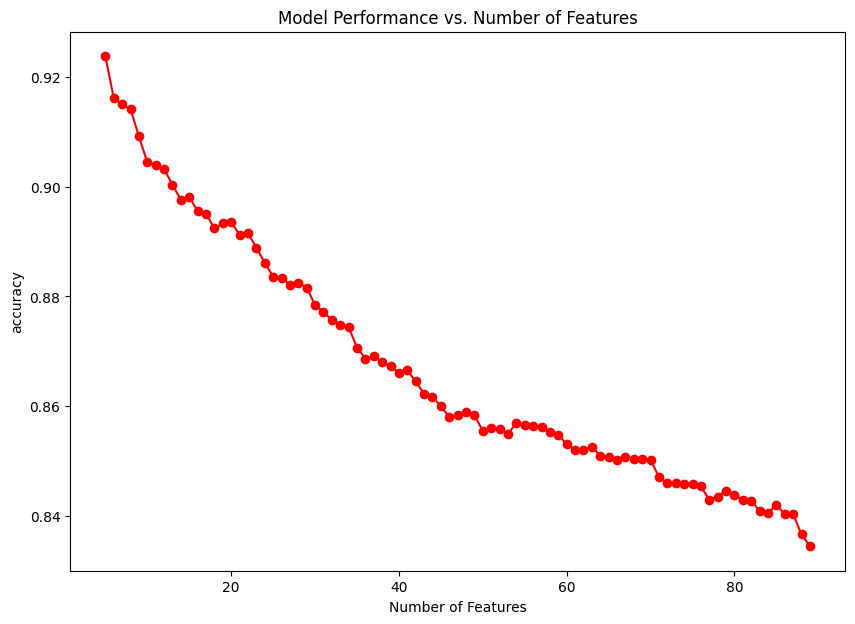

In [17]:
# Optimal no. of features

final_features = list(corr_features) 

ml.plot_num_feature_performance(gaussian_nb_test,  X, y, final_features, scoring='accuracy')


Maximum f1 = 0.6757 for 5 features


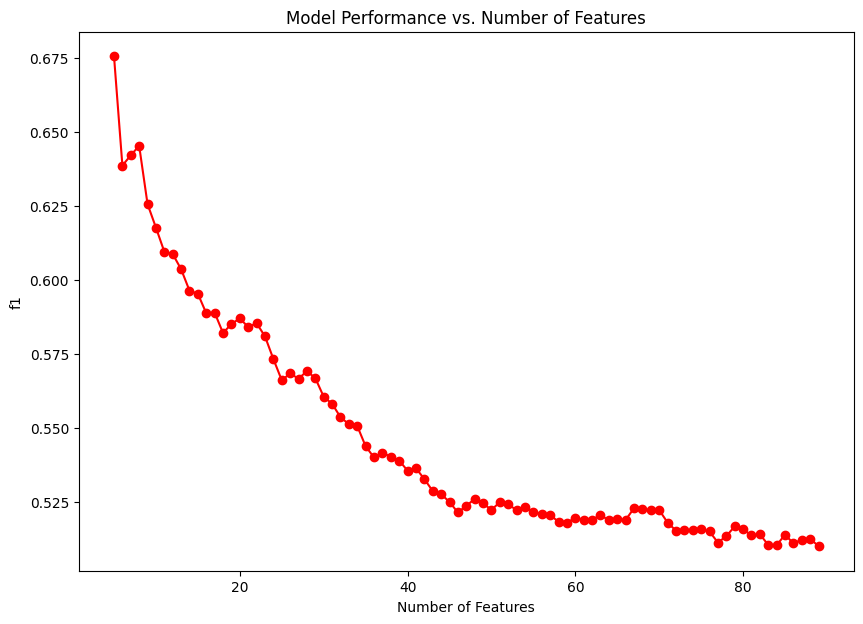

In [18]:
# Optimal no. of features

ml.plot_num_feature_performance(gaussian_nb_test,  X, y, final_features, scoring='f1')


Maximum recall = 0.6550 for 89 features


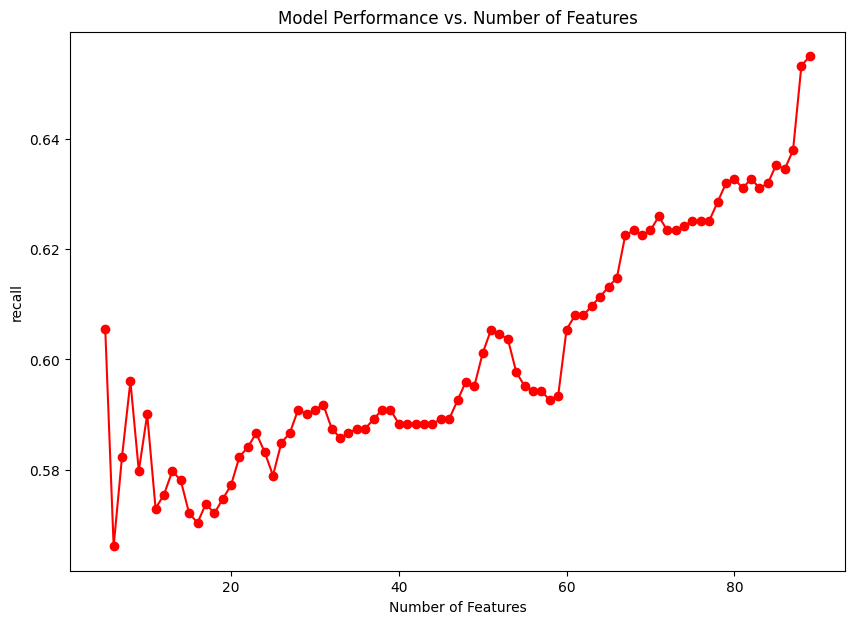

In [19]:
# Optimal no. of features

ml.plot_num_feature_performance(gaussian_nb_test,  X, y, final_features, scoring='recall')


Maximum precision = 0.7666 for 5 features


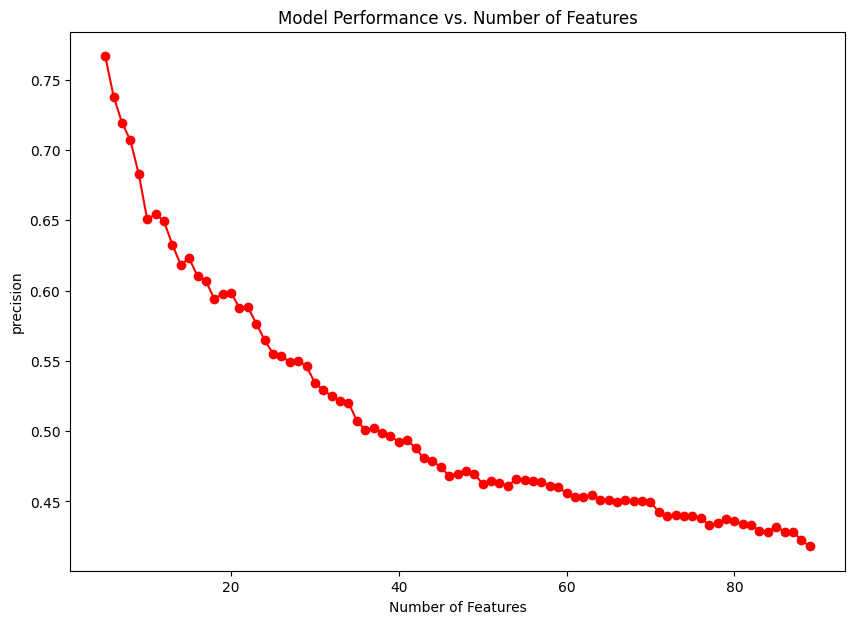

In [20]:
# Optimal no. of features

ml.plot_num_feature_performance(gaussian_nb_test,  X, y, final_features, scoring='precision')

In [10]:
num_features = 5

selected = final_features[:num_features]
selected.append('Diabetes')

diabetes_df = diabetes_df[selected]

## Preprocessing

### Zero Imputation

In [23]:
# Imputing null values with zeroes

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                        impute = True, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)

In [24]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.855

Test Accuracy: 0.863

Precision: 0.497

Recall: 0.661

F1-Score: 0.567


### Mode Imputation

In [25]:
# Imputing with most frequent values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='most_frequent'),
                                                              random_state=42)

In [26]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.914

Test Accuracy: 0.913

Precision: 0.683

Recall: 0.678

F1-Score: 0.680


### k-NN Imputation

In [27]:
# Imputing missing values with values from the k-nearest neighbors in the feature space

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.KNNImputer(n_neighbors=20),
                                                              random_state=42)

In [28]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.913

Test Accuracy: 0.914

Precision: 0.675

Recall: 0.713

F1-Score: 0.693


### Multiple Imputation by Chained Equations (MICE)

In [29]:
# Imputes by looking at data from other columns and trying to estimate the best prediction for each missing value.

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.IterativeImputer(max_iter=20),
                                                              random_state=42)

In [30]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.920

Test Accuracy: 0.920

Precision: 0.700

Recall: 0.719

F1-Score: 0.709


### Median Imputation

In [31]:
# Imputing with median values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='median'),
                                                              random_state=42)

In [32]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.918

Test Accuracy: 0.915

Precision: 0.700

Recall: 0.659

F1-Score: 0.679


### Mean Imputation

In [33]:
# Splitting and Preprocessing data

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

In [34]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.922

Test Accuracy: 0.921

Precision: 0.759

Recall: 0.612

F1-Score: 0.677


### Dropping Null Values

In [11]:
# Drop null values
diabetes_df_na = diabetes_df.dropna()

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df_na, label = 'Diabetes',
                                                              impute = False, scale=True,
                                                              random_state=42)

In [12]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.921

Test Accuracy: 0.929

Precision: 0.872

Recall: 0.743

F1-Score: 0.802


## Oversampling and Undersampling

### Random Oversampling

In [37]:
X_ros, y_ros = ml.random_over_sample(X_train, y_train)

gaussian_nb.fit(X_ros, y_ros)

ml.evaluate_model_metrics(gaussian_nb,X_ros, y_ros,X_val, y_val)


Train Accuracy: 0.880

Test Accuracy: 0.922

Precision: 0.801

Recall: 0.797

F1-Score: 0.799


### SMOTE (Synthetic Minority Over-sampling Technique)

In [38]:
X_smote, y_smote = ml.smote_over_sample(X_train, y_train)

gaussian_nb.fit(X_smote, y_smote)

ml.evaluate_model_metrics(gaussian_nb,X_smote, y_smote,X_val, y_val)


Train Accuracy: 0.874

Test Accuracy: 0.920

Precision: 0.790

Recall: 0.802

F1-Score: 0.796


### Random Undersampling

In [39]:
X_rus, y_rus = ml.random_under_sample(X_train, y_train)

gaussian_nb.fit(X_rus, y_rus)

ml.evaluate_model_metrics(gaussian_nb,X_rus, y_rus,X_val, y_val)


Train Accuracy: 0.872

Test Accuracy: 0.919

Precision: 0.786

Recall: 0.802

F1-Score: 0.794


### Tomek Links

In [40]:
X_tomek, y_tomek = ml.tomek_links(X_train, y_train)

gaussian_nb.fit(X_tomek, y_tomek)

ml.evaluate_model_metrics(gaussian_nb,X_tomek, y_tomek,X_val, y_val)


Train Accuracy: 0.923

Test Accuracy: 0.926

Precision: 0.849

Recall: 0.752

F1-Score: 0.798


### SMOTE + Tomek Links

In [41]:
X_smote_tomek, y_smote_tomek = ml.smote_tomek(X_train, y_train)

gaussian_nb.fit(X_smote_tomek, y_smote_tomek)

ml.evaluate_model_metrics(gaussian_nb,X_smote_tomek, y_smote_tomek,X_val, y_val)


Train Accuracy: 0.880

Test Accuracy: 0.919

Precision: 0.786

Recall: 0.802

F1-Score: 0.794


In [42]:
# Model seems to perform better without oversampling or undersampling

## Hyperparameter Optimization 

### Grid Search

In [13]:
# Since GaussianNB is a very simple model there aren't much hyperparamters to tune

param_grid = {
    
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]

}

In [14]:
grid_best_params, gaussian_nb_grid = ml.grid_search_optimize(gaussian_nb, param_grid, X_train, 
                                                                y_train, cv=10,scoring='accuracy')

In [15]:
grid_best_params

{'var_smoothing': 1e-09}

In [16]:
ml.evaluate_model_metrics(gaussian_nb_grid,X_train,y_train,X_val,y_val)


Train Accuracy: 0.921

Test Accuracy: 0.929

Precision: 0.872

Recall: 0.743

F1-Score: 0.802


### Random Search

In [17]:

rand_best_params, gaussian_nb_rand = ml.random_search_optimize(gaussian_nb,param_grid,n_iter=100,cv=5,
                                                               X_train=X_train, y_train=y_train,
                                                               scoring='accuracy')

In [18]:
rand_best_params

{'var_smoothing': 1e-09}

In [19]:
ml.evaluate_model_metrics(gaussian_nb_rand,X_train,y_train,X_val,y_val)


Train Accuracy: 0.921

Test Accuracy: 0.929

Precision: 0.872

Recall: 0.743

F1-Score: 0.802


### Optuna

In [20]:
def objective(trial):

    var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-1)

    model = GaussianNB(var_smoothing=var_smoothing)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = ml.accuracy_score(y_test, y_pred)

    return accuracy

In [21]:
best_trial , gaussian_nb_opt = ml.optuna_optimize(objective, GaussianNB, n_trials=150)

In [22]:
best_trial

{'var_smoothing': 0.007536162751889455}

In [23]:
gaussian_nb_opt.fit(X_train,y_train)

ml.evaluate_model_metrics(gaussian_nb_opt,X_train,y_train,X_val,y_val)


Train Accuracy: 0.923

Test Accuracy: 0.930

Precision: 0.882

Recall: 0.738

F1-Score: 0.803


## Evaluation on Test Set


Train Accuracy: 0.923

Test Accuracy: 0.916

Precision: 0.901

Recall: 0.718

F1-Score: 0.799

Confusion Matrix:

[[780  19]
 [ 68 173]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.92      0.98      0.95       799
     Class 1       0.90      0.72      0.80       241

    accuracy                           0.92      1040
   macro avg       0.91      0.85      0.87      1040
weighted avg       0.92      0.92      0.91      1040


ROC-AUC Curve:


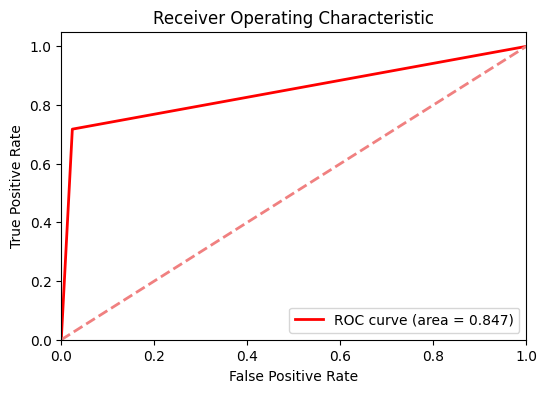

In [24]:
# After evaluating on the validation set, we evaluate and finalize on the test set

ml.evaluate_model_metrics(gaussian_nb_opt, X_train, y_train, X_test, y_test, verbose=6)

## Cross Validation

### K-fold

In [25]:
ml.k_cross_validate(gaussian_nb,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.91954023 0.93461538 0.91923077 0.91538462 0.92692308 0.91923077
 0.93461538 0.94230769 0.90769231 0.91538462]

Mean accuracy score:  0.9234924845269672

Standard deviation:  0.01022880366477744


In [26]:
ml.k_cross_validate(gaussian_nb_grid,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.91954023 0.93461538 0.91923077 0.91538462 0.92692308 0.91923077
 0.93461538 0.94230769 0.90769231 0.91538462]

Mean accuracy score:  0.9234924845269672

Standard deviation:  0.01022880366477744


In [27]:
ml.k_cross_validate(gaussian_nb_rand,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.91954023 0.93461538 0.91923077 0.91538462 0.92692308 0.91923077
 0.93461538 0.94230769 0.90769231 0.91538462]

Mean accuracy score:  0.9234924845269672

Standard deviation:  0.01022880366477744


In [28]:
ml.k_cross_validate(gaussian_nb_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.91954023 0.93076923 0.91923077 0.91538462 0.92692308 0.92307692
 0.92692308 0.93846154 0.91153846 0.91153846]

Mean accuracy score:  0.922338638373121

Standard deviation:  0.008202060893869862


### Stratified K-fold

In [29]:
ml.stratified_k_cross_validate(gaussian_nb,X,y,n_splits=10)


Average Accuracy: 0.9223489537282641

Average Precision: 0.8740287904819832

Average Recall: 0.74

Average F1-Score: 0.7993098916264961


In [30]:
ml.stratified_k_cross_validate(gaussian_nb_grid,X,y,n_splits=10)


Average Accuracy: 0.9223489537282641

Average Precision: 0.8740287904819832

Average Recall: 0.74

Average F1-Score: 0.7993098916264961


In [31]:
ml.stratified_k_cross_validate(gaussian_nb_rand,X,y,n_splits=10)


Average Accuracy: 0.9223489537282641

Average Precision: 0.8740287904819832

Average Recall: 0.74

Average F1-Score: 0.7993098916264961


In [32]:
ml.stratified_k_cross_validate(gaussian_nb_opt,X,y,n_splits=10)


Average Accuracy: 0.9242705570291777

Average Precision: 0.890725007601111

Average Recall: 0.7327272727272728

Average F1-Score: 0.801298325742481


### Save Model

In [33]:
final_gaussian_estimator = gaussian_nb_opt

In [34]:
# Saving the model

ml.save_model(final_gaussian_estimator, "../Models/Diabetes/GaussianNB.pkl")

Overwrite File? [y/n]: y
Saved Model


## Prediction

In [41]:
# Predicting on perturbed values

ml.predict_on_modified_instance(final_gaussian_estimator, X_test.iloc[0], y_test.iloc[0], 0.4)

Instance:
 [-0.72972932 -0.44530435 -1.47533357 -1.36613286 -1.07403271]

Expected Class:  0

 Modified Instance:
 [-0.72972932 -0.01075172 -1.49438439 -1.24976916 -1.09428158]

Predicted Class:  [0]


In [46]:
ml.predict_on_modified_instance(final_gaussian_estimator, X_test.iloc[10], y_test.iloc[10], 0.6)

Instance:
 [1.44209967 1.06002731 1.06891004 1.15462709 0.23911235]

Expected Class:  1

 Modified Instance:
 [1.44209967 1.3337313  1.13748961 0.94148192 0.06335741]

Predicted Class:  [1]
